## SA
Simulated annealing is an optimization technique<br>
SA is based on MCMC sampling to find an extrema point (mode) of a density f(x)
MCMC sampling chooses x from a selective pool of sucessive x's, reducing probability of stucking @ local extrema instead of global extrema <br>
In Boltzmann distribution, which its density is defined as f(x) $\alpha\,\, e^{\pm G(x)}$, the global extrema of G(x)  can be found by searching for the mode of the distribution<br>
Rubinstein and Kroese 2017

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

### Double well consists of 1 local and 1 global minima
say an asymetric double well is defined as
$$f(x) = x^4 - \dfrac{3}{2}x^2 - \delta \,x$$

In [59]:
#let delta=0.4
f=lambda x: x**4-3/2*x**2-0.4*x
#def temp T = T_0 *theta*t
T_0=1
theta=0.995
T=lambda t: T_0*theta**t#+1e-5
def acceptance(x,y,t):
	return min(1, np.exp((f(x)-f(y))/T(t))) #Boltzmann

In [60]:
dev=.1
X=-0.8 #init, ~ @ the local min
X_opt=-0.8
Xs=[]
iter=int(1e5) #1e5 is kinda overkill
for t in range(iter):
	Y=np.random.normal(X,dev)
	eps=np.random.rand()
	if eps < acceptance(X,Y,t):
		X=Y
	if f(X) <= f(X_opt): #minima problem
		X_opt=X
	Xs.append(X)


/tmp/ipykernel_4595/4196368422.py:8: RuntimeWarning: overflow encountered in exp
  return min(1, np.exp((f(x)-f(y))/T(t))) #Boltzmann


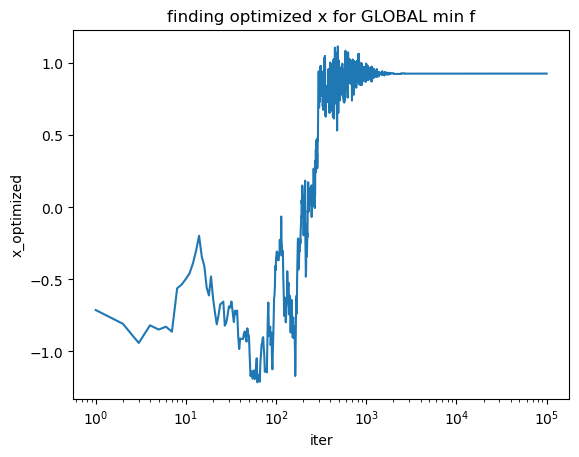

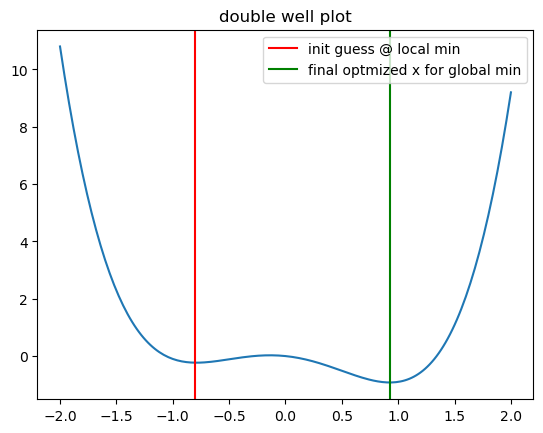

In [71]:
plt.plot(range(1,iter+1),Xs)
plt.xscale('log')
plt.xlabel('iter')
plt.ylabel('x_optimized')
plt.title('finding optimized x for GLOBAL min f')
plt.show()
#plot for double well
x_plot=np.linspace(-2,2,201)
plt.plot(x_plot,f(x_plot))
plt.axvline(x=-0.8,color='red',label='init guess @ local min')
plt.axvline(x=X_opt,color='green',label='final optmized x for global min')
plt.title('double well plot')
plt.legend()
plt.show()